In [1]:
import cv2,os
def get_id_color(index):
    #temp_index = abs(int(index + 1)) * 3
    if index == 1:
        color=(0,255,0)
    elif index == 2:
        color=(255,0,0)
    elif index ==3 :
        color=(255,255,0)
    text_color_bgr = tuple(reversed(color))
    return text_color_bgr
def mapping(id):
    id_to_char={1:'Healthy',2:'Tomato',3:'Unhealthy'}
    #ids=[1,2,3]
    chars =id_to_char[id]
    return(chars)
def draw_inferences(image,d_bboxes,d_scores,d_class_ids):

    for bbox, score, class_id in zip(d_bboxes, d_scores, d_class_ids):
        x1, y1, x2, y2 = int(bbox[0]), int(bbox[1]), int(bbox[2]), int(bbox[3])
        color = get_id_color(class_id)
        debug_image = cv2.rectangle(image,(x1, y1),(x2, y2),color,thickness=2)
        #score = '%.2f' % score

        #text = str(mapping(class_id))+':'+str(score)
        #debug_image = cv2.putText(debug_image,text,(x1, y1 - 22),cv2.FONT_HERSHEY_SIMPLEX,0.8,color,thickness=2)
    return (debug_image)


In [4]:
###import detector
import matplotlib.pyplot as plt
from Detector.detector import ObjectDetector
detector_name='yolo_tgi_n'
img_name='IMG_1207_JPG.rf.c9baad90b790f02b5fe0fedbeb57a63c.jpg'  ###Bacteria.jpg,Mold.jpg,Purple leaf.jpg,Yellow virus.jpg
img_dir='img_test'
#img_save_dir=''
img_path=os.path.join(img_dir,img_name)
detector = ObjectDetector(detector_name)
image=cv2.imread(img_path)
d_bboxes, d_scores, d_class_ids = detector(image)
print(d_bboxes, d_scores, d_class_ids )
save_path='inferenced_img.jpg'
labeled_img=draw_inferences(image,d_bboxes,d_scores,d_class_ids)
#plt.imshow(labeled_img)
#cv2.imwrite(save_path,labeled_img)


[[299 190 325 216]
 [ 56 406 118 468]
 [241 185 287 231]
 [170 358 326 514]
 [283 167 319 203]
 [329 452 405 528]
 [558 374 587 403]
 [488 465 519 496]
 [274 491 304 521]
 [115 536 210 631]
 [100 451 272 623]
 [416 408 469 461]
 [ 38 286 120 368]
 [299 507 335 543]
 [545 448 598 501]
 [578 385 610 417]
 [216 265 321 370]
 [221  85 303 167]
 [421 314 488 381]
 [498 265 544 311]
 [551 246 601 296]
 [556 455 599 498]
 [627 390 640 403]
 [  7 470  93 556]
 [597 370 615 388]
 [372 391 400 419]
 [346 134 452 240]
 [294 347 348 401]
 [396 566 446 616]
 [260 471 293 504]
 [629 557 639 567]
 [  0 159  46 205]] [0.79130507 0.78103656 0.7704567  0.76468617 0.7585776  0.7570136
 0.75394166 0.72159064 0.7182181  0.7161557  0.71510327 0.7088589
 0.7003995  0.6945846  0.6896814  0.6737242  0.6632295  0.6107446
 0.6045589  0.60273963 0.590219   0.5572574  0.5565722  0.5460501
 0.5327854  0.5175541  0.50735086 0.47065786 0.45029625 0.42124456
 0.42105636 0.4165871 ] [2 1 2 1 2 3 2 3 2 1 1 3 1 2 3 2 3 1

True

/Users/kangrui/miniconda3/envs/gpu-local/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 26816 (\N{CJK UNIFIED IDEOGRAPH-68C0}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/kangrui/miniconda3/envs/gpu-local/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 27979 (\N{CJK UNIFIED IDEOGRAPH-6D4B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/kangrui/miniconda3/envs/gpu-local/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 29575 (\N{CJK UNIFIED IDEOGRAPH-7387}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/kangrui/miniconda3/envs/gpu-local/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 38543 (\N{CJK UNIFIED IDEOGRAPH-968F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/kangrui/miniconda3/envs/gpu-local/lib/python3.10/site-packages/IPython/core/p

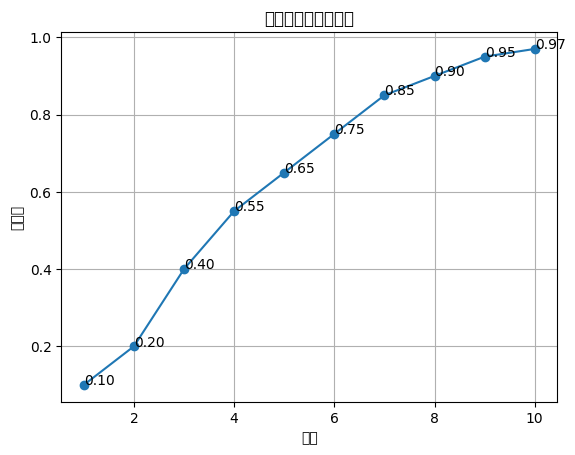

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# 假设的时间点，比如可以是小时、天、月等
time_points = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

# 对应的检测率数据
detection_rates = np.array([0.1, 0.2, 0.4, 0.55, 0.65, 0.75, 0.85, 0.9, 0.95, 0.97])

# 绘制曲线图
plt.plot(time_points, detection_rates, marker='o')  # marker参数是为了在每个数据点上放置一个标记

# 添加标题和轴标签
plt.title('检测率随时间的变化')
plt.xlabel('时间')
plt.ylabel('检测率')

# 显示网格
plt.grid(True)

# 可选：添加数据点的标注
for i, txt in enumerate(detection_rates):
    plt.annotate(f'{txt:.2f}', (time_points[i], detection_rates[i]))

# 显示图形
plt.show()

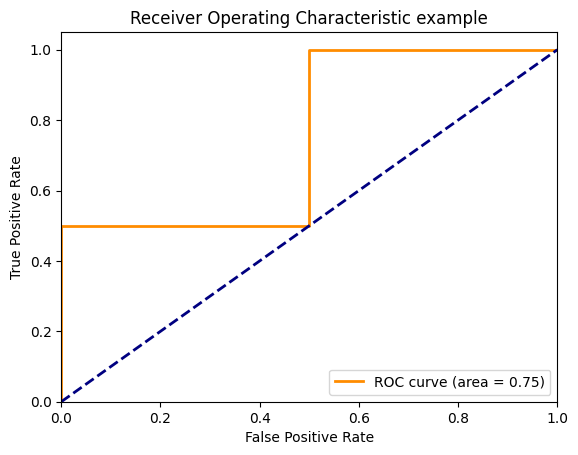

In [11]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from scipy import interp
from sklearn import metrics
import numpy as np

# 假设这些是模型预测得到的概率和真实标签
y_true = np.array([0, 0, 1, 1])  # 真实标签
y_scores = np.array([0.1, 0.4, 0.35, 0.8])  # 预测得分

# 计算FPR, TPR, 阈值
fpr, tpr, thresholds = roc_curve(y_true, y_scores)

# 计算AUC
roc_auc = auc(fpr, tpr)

# 绘制ROC曲线
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)

# 绘制对角线（随机概率线）
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

# 添加标签和标题
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic example')
plt.legend(loc="lower right")

# 显示图形
plt.show()


In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import pi

# 读取CSV文件
df = pd.read_csv('Fig7/Multiple_detectors.csv')

# 设置一个颜色列表，你可以根据需要更改颜色
colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'orange', 'purple', 'brown']

# 如果有更多的name，可以生成一个足够大的颜色列表
if len(df['Name']) > len(colors):
    colors = plt.cm.viridis(np.linspace(0, 1, len(df['name'])))

# 绘制雷达图的函数
def make_spider(row, title, color, num_plots, plot_index):
    # 雷达图的变量数（即数据列数减去名称列）
    categories = list(df.columns[1:])
    N = len(categories)

    # 计算雷达图的角度
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    # 绘图
    ax = plt.subplot(1, num_plots, plot_index, polar=True)
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)
    plt.xticks(angles[:-1], categories, color='grey', size=8)
    ax.set_rlabel_position(0)
    plt.yticks([20, 40, 60, 80], ["20", "40", "60", "80"], color="grey", size=7)
    plt.ylim(0,100)

    # 绘制雷达图数据
    values = df.loc[row, categories].values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, color=color, linewidth=2, linestyle='solid')
    ax.fill(angles, values, color=color, alpha=0.4)

    # 添加标题
    plt.title(title, size=11, color=color, y=1.1)

# 准备绘制雷达图
num_plots = len(df['Name'])
plt.figure(figsize=(4*num_plots, 4))

# 遍历数据，为每个个体绘制雷达图
for i, row in df.iterrows():
    color = colors[i % len(colors)]
    make_spider(row=i, title=df['Name'][i], color=color, num_plots=num_plots, plot_index=i+1)

# 调整布局
plt.tight_layout()

# 保存图表为SVG文件
plt.savefig('radar_chart.svg', format='svg', bbox_inches='tight')

# 关闭绘图窗口，确保后续的savefig没有问题
plt.close()

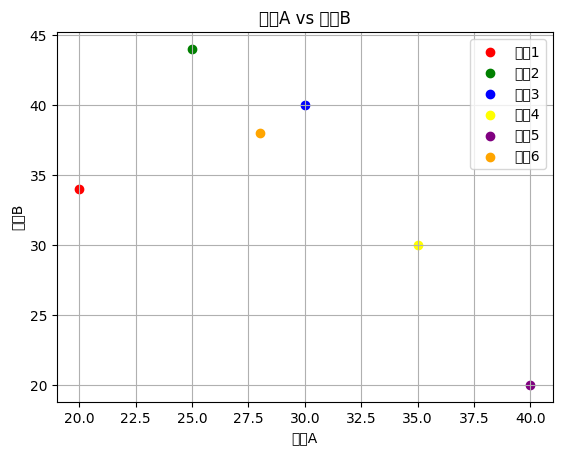

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# 创建数据: 每一行代表一个标签的数据集
data = np.array([
    [20, 34], # 标签1的数据 (只包含属性A和属性B)
    [25, 44], # 标签2的数据
    [30, 40], # 标签3的数据
    [35, 30], # 标签4的数据
    [40, 20], # 标签5的数据
    [28, 38]  # 标签6的数据
])

# 颜色数组，长度和标签数量一致
colors = ['red', 'green', 'blue', 'yellow', 'purple', 'orange']

# 分离属性A和属性B的数据
a_data = data[:, 0] # 所有行的第0列
b_data = data[:, 1] # 所有行的第1列

# 绘制散点图, 每个标签的点用不同颜色表示
for i in range(len(data)):
    plt.scatter(a_data[i], b_data[i], color=colors[i], label=f'标签{i+1}')

# 添加标题和轴标签
plt.title('属性A vs 属性B')
plt.xlabel('属性A')
plt.ylabel('属性B')

# 添加图例
plt.legend()

# 显示网格
plt.grid(True)

# 显示图形
plt.show()

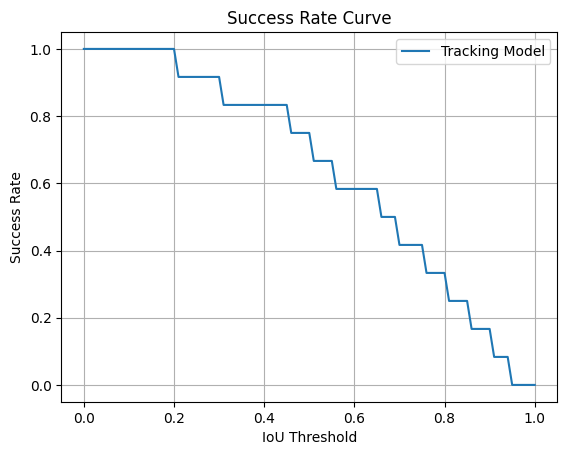

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# 假设我们有跟踪结果和真实标签的IoU数据
iou_data = np.array([0.9, 0.75, 0.5, 0.3, 0.2, 0.95, 0.85, 0.7, 0.55, 0.45, 0.65, 0.8])

# 设置不同的IoU阈值
iou_thresholds = np.linspace(0, 1, num=101)

# 初始化成功率列表
success_rates = []

# 计算每个IoU阈值的成功率
for threshold in iou_thresholds:
    success_rates.append((iou_data >= threshold).mean())

# 绘制成功率曲线
plt.plot(iou_thresholds, success_rates, label='Tracking Model')

# 添加标题和标签
plt.title('Success Rate Curve')
plt.xlabel('IoU Threshold')
plt.ylabel('Success Rate')

# 显示图例
plt.legend()

# 显示网格
plt.grid(True)

# 显示曲线
plt.show()

In [91]:
import pandas as pd
import os

# 设定工作目录到你的文件夹路径
folder_path = 'track_csv/track_csv'
all_files = sorted([f for f in os.listdir(folder_path) if f.endswith('.csv')])

# 创建一个空的DataFrame用于汇总数据
summary_df = pd.DataFrame()

for file in all_files:
    # 完整的文件路径
    file_path = os.path.join(folder_path, file)

    # 读取CSV文件
    df = pd.read_csv(file_path, usecols=['video_name','frame_count', 'total_numbers', 'inference_time'])  # 仅读取B, C, D列

    # 获取不带扩展名的文件名
    file_name = os.path.splitext(file)[0]

    # 计算D除以B的值，并添加为新列，列名用文件名标识
    column_name_div = f'{file_name}_inference'
    df[column_name_div] = df['inference_time'] / df['frame_count'] * 2*0.66

    # 将文件名用作C列的新列名
    column_name_c = f'{file_name}_total_numbers'
    df.rename(columns={'total_numbers': column_name_c}, inplace=True)

    # 只保留改名后的C列和新计算的列
    df = df[['video_name',column_name_div]]
   # df = df[['video_name',column_name_c]]
    # 将数据追加到汇总的DataFrame中
    # 使用merge来确保不同文件中的行可以对应起来，这里假设B列可以作为唯一标识，如时间戳或ID
    if summary_df.empty:
        summary_df = df
    else:
        summary_df = summary_df.merge(df, on='video_name', how='outer')

# 删除合并后多余的B列
#summary_df.drop(columns=['frame_count'], inplace=True)

# 将汇总数据保存到CSV文件中
summary_df.to_csv('track_csv/inference_time.csv', index=False)

/var/folders/lw/md92pbw164q_b180241pqcq40000gn/T/ipykernel_61514/1435543963.py:26: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=actual_values_col, y=predicted_values_col, data=data, color='green', palette=colors, legend=None,s=600)


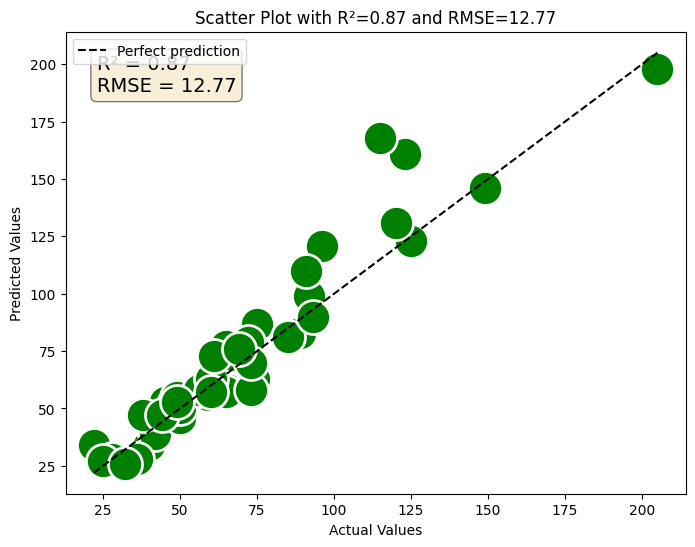

In [130]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt

# 替换为你的CSV文件路径
file_path = 'track_csv/no_summary_231103.csv'

# 替换为你的列名
actual_values_col = 'True no'  # 实际值的列名
predicted_values_col = 'yolo_tgi_s_motpy_total_numbers'       # 预测值的列名

###mc_bytetrack motpy mc_norfair
# 读取CSV文件
data = pd.read_csv(file_path)


# 计算R²和RMSE
r2 = r2_score(data[actual_values_col], data[predicted_values_col])
rmse = sqrt(mean_squared_error(data[actual_values_col], data[predicted_values_col]))

# 使用Seaborn绘制散点图
plt.figure(figsize=(8, 6))
#### orange green blue
sns.scatterplot(x=actual_values_col, y=predicted_values_col, data=data, color='green', palette=colors, legend=None,s=600)

# 添加R²和RMSE到图表中
plt.title(f'Scatter Plot with R²={r2:.2f} and RMSE={rmse:.2f}')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

# 绘制对角线表示完美预测
diagonal = [min(data[actual_values_col].min(), data[predicted_values_col].min()),
            max(data[actual_values_col].max(), data[predicted_values_col].max())]
plt.plot(diagonal, diagonal, 'k--', label='Perfect prediction')

textstr = f'R² = {r2:.2f}\nRMSE = {rmse:.2f}'
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
plt.text(0.05, 0.95, textstr, transform=plt.gca().transAxes, fontsize=14,
         verticalalignment='top', bbox=props)

# 添加图例
plt.legend()

# 保存图像为SVG格式
plt.savefig(predicted_values_col+'.svg', format='svg',dpi=500)

# 显示图形
plt.show()

In [3]:
import cv2
# Load the video
video_path = 'videos/yolox_demo.mp4'  # Replace with your video file path
cap = cv2.VideoCapture(video_path)

if not cap.isOpened():
    print("Error: Could not open video.")
    exit()

# Count the total number of frames
total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
print(f"Total number of frames in the video: {total_frames}")

# Go to the 300th frame and read it
frame_number = 300
if frame_number <= total_frames:
    cap.set(cv2.CAP_PROP_POS_FRAMES, frame_number - 1)
    ret, frame = cap.read()

    if ret:
        # Save the frame as a JPG image
        cv2.imwrite('yolox_frame300.jpg', frame)
        print("Frame 300 has been saved as 'frame300.jpg'")
    else:
        print("Error: Could not read frame 300.")
else:
    print("The video does not have 300 frames.")

# Release the video capture object
cap.release()

Total number of frames in the video: 399
Frame 300 has been saved as 'frame300.jpg'
